## Exercise - week 3

### Exercise 1 - classes

1. Create 3 classes: Student, DataSheet and Course
2. A student has a data_sheet and a data_sheet has multiple courses in particular order
3. Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
4. In Student create init() so that a Student can be initiated with name, gender, data_sheet and image_url
5. In DataSheet create a method to get_grades_as_list()
6. In student create a method: get_avg_grade()


In [53]:
class Course():
    def __init__(self, name, classroom, teacher, ECTS, grade = None):
        self.name = name
        self.classroom = classroom
        self.teacher = teacher
        self.ECTS = ECTS
        self.grade = grade
    
class Data_sheed():
    def __init__(self, courses = []):
        self.courses = courses
        
    def add_course(self, course):
        self.courses.append(course)
        
    def get_grades_as_list(self):
        grades = []
        for course in self.courses:
            grades.append(course.grade)
        return grades
    
class Student():
    def __init__(self, name, gender, data_sheed, image_url):
        self.data_sheed = data_sheed
        self.name = name
        self.gender = gender
        self.image_url = image_url
    
    def get_avg_grade(self):
        grades = self.data_sheed.get_grades_as_list()
        return sum(grades) / len(grades)
    
    """9. Make a method on Student class that can show progression of 
    the study in % (add up ECTS from all passed courses divided by total
    of 150 total points (equivalent to 5 semesters))"""
    
    def show_progress(self):
        total_ects = 0
        for course in self.data_sheed.courses:
            if(course.grade != None):
                total_ects += int(course.ECTS)
        return (total_ects/150)*100
    
    """2A. create a method on student that can return a list of courses"""
    def get_all_courses(self):
        return self.data_sheed.courses
    

7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url

    A. Let the function write the result to a csv file with format stud_name, course_name, teacher, ects, classroom, grade, img_url

In [54]:
import random
import csv

course1 = Course("Programming", "1.03", "Tue",30, 12)
course2 = Course("System Development", "2.06", "Palle",15,10)
course3 = Course("Python", "1.03", "Thomas",15,7)

def generate_students(number_of_students):
    course_names=['Programming','System Development','Python','Security','Fullstack Javascript']
    classrooms=['1.03','2.05','2.64','3.01']
    teachers=['Tue','Tobias','Jon','Thomas','Tine']
    ECTS=[15,10,30,5]
    grades=[0,2,4,7,10,12]
    
    names=['Amanda','Amalie','Benjamin','Laura','Dominik','Jonas','Dylan','Andrea','Harald','Hyben']
    gender=['Female','Male','Transgender','Agender','Bigender','Polygender']
    images=["http://lava360.com/wp-content/uploads/2016/04/Spot-on-funny-caricatures-from-photos1.0.jpg", "https://i.ytimg.com/vi/lBosbEgC_5o/hqdefault.jpg", "http://www.kgsartwear.com/wp-content/uploads/2013/07/upperlip.jpg", "https://www.askideas.com/media/14/Angry-Face-Funny-Woman-Image.jpg", "http://3.bp.blogspot.com/-uoHXkY0ttDU/T98R1DYew9I/AAAAAAAAG5E/15Qb-05Wh1I/s1600/funny+face+expressions+%2819%29.jpg", "https://www.askideas.com/media/50/Funny-Jim-Carrey-Smiling-Face-Picture.jpg", "http://4.bp.blogspot.com/-NciOIYoZS6I/T98R7LJymiI/AAAAAAAAG5U/ZVRFD25RxD8/s1600/funny+face+expressions+%2820%29.jpg"]
    
    students = []
    for x in range(number_of_students):
        courses = []
        for x in range(random.randint(2,4)):
            course = Course(random.choice(course_names),random.choice(classrooms),random.choice(teachers),random.choice(ECTS),random.choice(grades))
            courses.append(course)
        
        data_sheed = Data_sheed(courses)
        student = Student(random.choice(names),random.choice(gender),data_sheed,random.choice(images))
        students.append(student)
    
    with open('students.csv', 'w') as file:
        writer = csv.writer(file)
        writer.writerow(["stud_name", "gender", "course_name", "teacher", "ects", "classroom", "grade", "img_url"])
        for student in students:
            for course in student.data_sheed.courses:
                writer.writerow([student.name, student.gender, course.name, course.teacher, course.ECTS, 
                                    course.classroom, course.grade, student.image_url])

generate_students(4)

8. Read student data into a list of Students from a csv file:

    A. loop through the list and print each student with name, img_url and avg_grade.
    
    B. sort the list by avg_grade

In [70]:
import csv

with open('students.csv') as file:
    reader = csv.reader(file)
    next(reader)
    students = []
    
    for row in reader:
        name, gender, course_name, teacher, ects, classroom, grade, url = row
        course = Course( course_name, classroom, teacher, ects, int(grade))
        data_sheed = Data_sheed([course])
        student = Student(name, gender, data_sheed, url)
        
        if(len(students) == 0):
            students.append(student)
            
        elif(student.name == students[-1].name and student.gender == students[-1].gender):
            students[-1].data_sheed.add_course(course)
        else:
            students.append(student)
            
    sort_students = sorted(students, key=Student.get_avg_grade)
    for student in sort_students:
        
        print(student.name, student.image_url, student.gender, student.get_avg_grade(), student.show_progress())

Harald http://3.bp.blogspot.com/-uoHXkY0ttDU/T98R1DYew9I/AAAAAAAAG5E/15Qb-05Wh1I/s1600/funny+face+expressions+%2819%29.jpg Bigender 4.666666666666667 33.33333333333333
Hyben https://i.ytimg.com/vi/lBosbEgC_5o/hqdefault.jpg Female 4.666666666666667 36.666666666666664
Benjamin http://4.bp.blogspot.com/-NciOIYoZS6I/T98R7LJymiI/AAAAAAAAG5U/ZVRFD25RxD8/s1600/funny+face+expressions+%2820%29.jpg Male 6.5 36.666666666666664
Laura https://www.askideas.com/media/50/Funny-Jim-Carrey-Smiling-Face-Picture.jpg Agender 8.0 10.0


  C. create a bar chart with student_name on x and avg_grade on y-axis

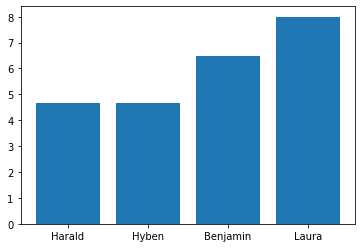

In [56]:
import matplotlib.pyplot as plt

names = [student.name for student in sort_students]
grades = [student.get_avg_grade() for student in sort_students]

plt.bar(names,grades)
plt.show()


10. Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)

I didn't understand this exercise


### Exercise 2 - exceptions

1. Create a function that can take a list of students and return the 3 students closest to completing their study.
2. If list is shorter than 3 raise your own custom exception (NotEnoughStudentsException)

In [57]:
class NotEnoughStudentsException(IndexError):
    def __init__(self, *args, **kwargs):
        IndexError.__init__(self, *args, **kwargs)
     

def furthest_students(students):
    """findes the 3 students that are furthest with their studies. sorted on etcs points"""
    sort_stud = sorted(students, key=Student.show_progress)
    if(len(sort_stud)<3):
        raise NotEnoughStudentsException("You only supplied {} stundents, but 3 is needed".format(len(sort_stud)))
    return sort_stud[-3:]

best_students = furthest_students(students)
for student in best_students:
        print(student.name, student.get_avg_grade(), student.show_progress())
        

exeption_students = furthest_students(students[0:2])


Harald 4.666666666666667 33.33333333333333
Hyben 4.666666666666667 36.666666666666664
Benjamin 6.5 36.666666666666664


NotEnoughStudentsException: You only supplied 2 stundents, but 3 is needed

3. Create another function that can create a csv file with 3 students closest to completion

    A. If an exception is raised write an appropriate message to the file

In [58]:
def safe_best_students(students):
    try:
        best_students = furthest_students(students)
    
    except NotEnoughStudentsException as e:
        with open('best_students.csv', 'w') as file:
            writer = csv.writer(file)
            writer.writerow(["An error occured: {}".format(e.args[0])])
        
    else:
       
        with open('best_students.csv', 'w') as file:
            writer = csv.writer(file)
            writer.writerow(["stud_name", "gender", "course_name", "teacher", "ects", "classroom", "grade", "img_url"])
            for student in best_students:
                for course in student.data_sheed.courses:
                    writer.writerow([student.name, student.gender, course.name, course.teacher, course.ECTS, 
                                    course.classroom, course.grade, student.image_url])
    
safe_best_students(students[0:2])


### Exercise 3 - plotting

1. Create a function that can take a list of students and show a pie chart of how students are distributed in ECTS percentage categories (10%, 20%, ...)

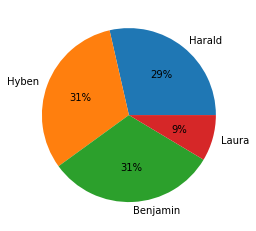

In [59]:
import matplotlib.pyplot as plt

def get_progress_piechart(students):
    list_of_ects = {}
    for student in students:
        list_of_ects[student.name] = student.show_progress()
    plt.pie(list_of_ects.values(), labels=list_of_ects.keys(), autopct='%1.0f%%')  
    plt.show

get_progress_piechart(students)

2. create a function that can take a list of students and show how many students have taken each course (bar chart)
    
    A. create a method on student that can return a list of courses

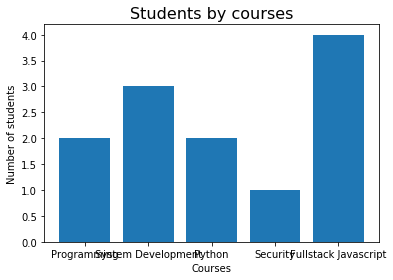

In [71]:
import matplotlib.pyplot as plt

def get_students_by_course(students):
    courses = []
    course_names = []
    student_pr_course = {}
    all_courses=['Programming','System Development','Python','Security','Fullstack Javascript']
    
    for student in students:
        courses.extend(student.get_all_courses())
    
    for course in courses:
        course_names.append(course.name)
        
    for course in all_courses:
        student_pr_course[course] = course_names.count(course)

    plt.title("Students by courses", fontsize=16)
    plt.ylabel("Number of students")
    plt.xlabel("Courses")
    plt.bar(student_pr_course.keys(), student_pr_course.values())
    plt.show

get_students_by_course(students)

3. Make the figure show males and females in different colors for each course (display 2 datasets in same figure)

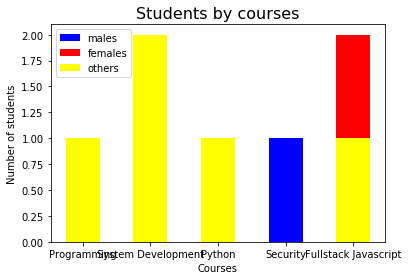

In [89]:
import matplotlib.pyplot as plt

def get_students_by_course(students):   
    females_pr_course = {'Programming':0,'System Development':0,'Python':0,'Security':0,'Fullstack Javascript':0}
    males_pr_course = {'Programming':0,'System Development':0,'Python':0,'Security':0,'Fullstack Javascript':0}
    gender_pr_course = {'Programming':0,'System Development':0,'Python':0,'Security':0,'Fullstack Javascript':0}
    all_courses=['Programming','System Development','Python','Security','Fullstack Javascript']
    
    for coursename in all_courses:
        for student in students:
            for course in student.get_all_courses():
                if course.name == coursename:
                    if student.gender == 'Male':  
                        males_pr_course[coursename] += 1 
                        
                    elif student.gender == 'Female':
                        females_pr_course[coursename]+= 1 
                        
                    else:
                        gender_pr_course[coursename] += 1 
                        
    
    male_courses = list(males_pr_course.keys())
    no_males = list(males_pr_course.values()) 
    
    female_courses = list(females_pr_course.keys())
    no_females = list(females_pr_course.values()) 
    
    gender_courses = list(gender_pr_course.keys())
    no_gender = list(gender_pr_course.values())

    plt.ticklabel_format(useOffset=False)
    plt.axis([0, len(all_courses), 0, 5])
    plt.title("Students by courses", fontsize=16)
    plt.ylabel("Number of students")
    plt.xlabel("Courses")
    
    
    plt.tick_params(axis='both', which='major', labelsize=10)
    p1 = plt.bar(male_courses, no_males, width=0.5, linewidth=0, align='center', color='blue')
    p2 = plt.bar(female_courses, no_females, width=0.5, linewidth=0, align='center', color='red') 
    p3 = plt.bar(gender_courses, no_gender, width=0.5, linewidth=0, align='center', color='yellow') 
    plt.legend([p1,p2,p3],['males','females','others']) 
    plt.show
    

get_students_by_course(students)
    